In [2]:
import numpy as np

In [3]:
x = np.array([2,-4,6,7])
y = np.array([4,5,8,-9])

In [4]:
x+y

array([ 6,  1, 14, -2])

In [5]:
z = np.array([6,1,14,-2])

In [6]:
np.equal(x+y,z)

array([ True,  True,  True,  True])

In [7]:
all(np.equal(x+y,z))

True

In [42]:
from math import exp
def naive_exp(x:np.ndarray):
    x_exp=np.empty_like(x)
    for i in range(len(x)):
        x_exp[i]=exp(x[i])
    return x_exp

In [44]:
naive_exp(x)

array([   7,    0,  403, 1096])

In [28]:
 def bit_less_naive_exp(x:np.ndarray):
     return np.array([exp(x_i) for x_i in x])
 bit_less_naive_exp(x)

array([7.38905610e+00, 1.83156389e-02, 4.03428793e+02, 1.09663316e+03])

In [29]:
np.exp(x)

array([7.38905610e+00, 1.83156389e-02, 4.03428793e+02, 1.09663316e+03])

In [31]:
np.all(np.equal(naive_exp(x),np.exp(x)))

np.False_

In [47]:
np.sum(np.exp(x))

np.float64(1507.469323659013)

In [48]:
np.prod(x)

np.int64(-336)

In [51]:
def eucledian_norm(x: np.ndarray):
    return np.sqrt(np.sum(x**2))

In [54]:
a = np.array([-3,1.2,1.2,2.1])
b = np.array([8.1,6.3])

In [56]:
eucledian_norm(a)

np.float64(4.036087214122113)

In [58]:
eucledian_norm(b)

np.float64(10.261578825892242)

In [59]:
np.linalg.norm(a)

np.float64(4.036087214122113)

In [60]:
np.equal(eucledian_norm(a),np.linalg.norm(a))

np.True_

In [61]:
type(np.inf)

float

In [63]:
np.linalg.norm(a,ord=3)

np.float64(3.411867410817903)

In [64]:
def euclidean_distance(x:np.ndarray,y:np.ndarray):
    return np.linalg.norm(x-y,ord=2)
    

In [67]:
euclidean_distance(a,x)

np.float64(9.954396013822235)

In [68]:
np.dot(x,a)

np.float64(11.100000000000001)

In [72]:
# Gram-Schmidt Orthogonalization process

vectors = [np.random.rand(5) for _ in range(5)]
vectors

[array([0.88334664, 0.98441747, 0.87258561, 0.39808732, 0.76783031]),
 array([0.42062938, 0.96156539, 0.61240432, 0.80601495, 0.74272362]),
 array([0.12603135, 0.91438169, 0.98875412, 0.49843996, 0.24839194]),
 array([0.7842822 , 0.25990126, 0.06035356, 0.55135122, 0.63379475]),
 array([0.59555649, 0.26804854, 0.32893249, 0.85515557, 0.66444194])]

In [112]:
# Orthogonal projection operator
from typing import List

def projection(x:np.ndarray, to: List[np.ndarray]):
    """
    Computes the orthogonal projection of the vector`x`
    on to the subspace spanned by the set of vectors`to`
    """
    p_x = np.zeros_like(x)

    for e in to:
        e_norm_square = np.dot(e,e)
        p_x += np.dot(x,e)*e/e_norm_square

    return p_x
    
    

In [113]:
 x=np.array([1.5, 3.25])
 e= np.array([4.0, 2.0])
 x_to_e=projection(x,to=[e])

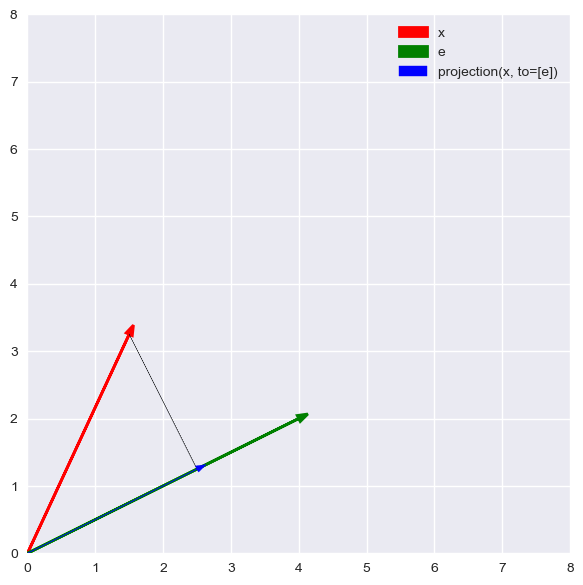

In [114]:
import matplotlib.pyplot as plt
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(7, 7))
    plt.xlim([-0, 8])
    plt.ylim([-0, 8])
    plt.arrow(0, 0,x[0],x[1],head_width=0.1,color="r",label="x",linewidth=2)
    plt.arrow(0, 0,e[0],e[1],head_width=0.1,color="g",label="e",linewidth=2)
    plt.arrow(x_to_e[0],x_to_e[1],x[0]-x_to_e[0],x[1]-x_to_e[1],linestyle="--")
    plt.arrow(0, 0, x_to_e[0], x_to_e[1], head_width=0.1, color="b",label="projection(x, to=[e])")
    plt.legend()
    plt.show()


In [109]:
np.allclose(np.dot(e,x-x_to_e),0.0)

False

In [110]:
def gram_schmidt(vectors: List[np.ndarray]):
    """ 
     Creates an orthonormal set of vectors from the input
     that spans the same subspaces.
    """
    output = []

    # finding orthogonal set of vectors
    output.append(vectors[0])
    for v in vectors[1:]:
        v_proj = projection(v, to=output)
        output.append(v - v_proj)

    #normalizing the result
    output = [v/np.linalg.norm(v,ord=2) for v in output]
    return output

v1 = np.array([2, 1])
v2 = np.array([1, 3])

# Apply Gram-Schmidt
gram_schmidtt([v1, v2])
    
# gram_schmidt([np.array([2.0, 1.0, 1.0]),
#               np.array([1.0, 2.0, 1.0]),
#               np.array([1.0, 1.0, 2.0])])
    

[array([0.89442719, 0.4472136 ]), array([-0.97618706, -0.21693046])]

e1 = [0.89442719 0.4472136 ]
e2 = [-0.97618706 -0.21693046]
Dot product (should be 0): -0.9701425001453319


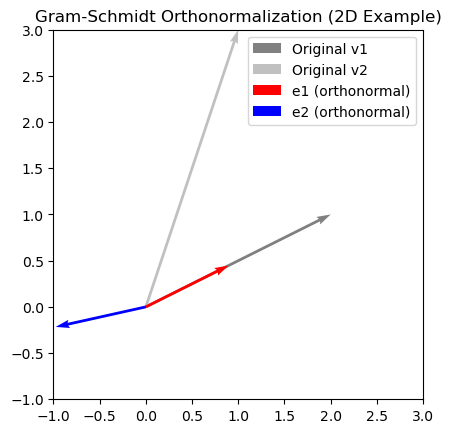

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def gram_schmidtt(vectors):
    """Perform Gram-Schmidt orthonormalization on a list of vectors."""
    output = []
    
    for v in vectors:
        # Make a copy so original isn't changed
        v_new = v.astype(float)
        
        # Subtract projections onto all previously computed basis vectors
        for u in output:
            proj = np.dot(v_new, u) * u   # projection of v_new onto u
            v_new = v_new - proj
        
        # Add the orthogonalized vector
        output.append(v_new)
    
    # Normalize all vectors (make them unit length)
    output = [v / np.linalg.norm(v, ord=2) for v in output]
    
    return output


# Example: two 2D vectors
v1 = np.array([2, 1])
v2 = np.array([1, 3])

# Apply Gram-Schmidt
orthonormal_vectors = gram_schmidtt([v1, v2])
e1, e2 = orthonormal_vectors

print("e1 =", e1)
print("e2 =", e2)
print("Dot product (should be 0):", np.dot(e1, e2))

# Visualization
origin = np.zeros(2)
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='gray', label='Original v1')
plt.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='silver', label='Original v2')
plt.quiver(*origin, *e1, angles='xy', scale_units='xy', scale=1, color='r', label='e1 (orthonormal)')
plt.quiver(*origin, *e2, angles='xy', scale_units='xy', scale=1, color='b', label='e2 (orthonormal)')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Gram-Schmidt Orthonormalization (2D Example)")
plt.show()
